### **空间计算模块 (`scipy.spatial`)**

`scipy.spatial` 提供了关于几何和空间计算的工具，包括距离计算、最近邻搜索和几何图形（如凸包和三角剖分）的计算。

### **1. 距离计算**

#### **1.1 距离矩阵 (`distance_matrix`)**

计算两组点之间的欧几里得距离矩阵。

In [1]:
import numpy as np
from scipy.spatial import distance_matrix

# 两组点
points_a = np.array([[1, 2], [3, 4], [5, 6]])
points_b = np.array([[7, 8], [9, 10], [11, 12]])

# 计算距离矩阵
dist_matrix = distance_matrix(points_a, points_b)
print("Distance Matrix:\n", dist_matrix)

Distance Matrix:
 [[ 8.48528137 11.3137085  14.14213562]
 [ 5.65685425  8.48528137 11.3137085 ]
 [ 2.82842712  5.65685425  8.48528137]]


#### **1.2 成对距离 (`pdist`) 和 样本间距离 (`cdist`)**

- `pdist`：计算单个样本组中每对点之间的距离。
- `cdist`：计算两个样本组之间所有点对的距离。

In [2]:
from scipy.spatial.distance import pdist, cdist

# 点集
points = np.array([[0, 0], [1, 1], [2, 2]])

# 成对距离
pairwise_distances = pdist(points, metric='euclidean')
print("Pairwise Distances:", pairwise_distances)

# 样本间距离
points_a = np.array([[0, 0], [1, 1]])
points_b = np.array([[2, 2], [3, 3]])
sample_distances = cdist(points_a, points_b, metric='euclidean')
print("Sample Distances:\n", sample_distances)

Pairwise Distances: [1.41421356 2.82842712 1.41421356]
Sample Distances:
 [[2.82842712 4.24264069]
 [1.41421356 2.82842712]]


### **2. 最近邻搜索**

#### **2.1 KD 树 (`KDTree`)**

`KDTree` 是一种高效的数据结构，用于最近邻搜索。

In [3]:
from scipy.spatial import KDTree

# 数据点
data_points = np.random.rand(10, 2)

# 创建 KD 树
kd_tree = KDTree(data_points)

# 搜索最近的点
query_point = [0.5, 0.5]
distance, index = kd_tree.query(query_point)
print(f"Closest point to {query_point}: {data_points[index]} at distance {distance}")

Closest point to [0.5, 0.5]: [0.5981279  0.58428057] at distance 0.12935338509629246


#### **2.2 球树 (`BallTree`)**

`BallTree` 也用于最近邻搜索，尤其适合处理高维数据。

In [4]:
from sklearn.neighbors import BallTree

# 数据点
data_points = np.random.rand(10, 2)

# 创建球树
ball_tree = BallTree(data_points)

# 搜索最近的点
query_point = [0.5, 0.5]
distance, index = ball_tree.query([query_point], k=1)
print(f"Closest point to {query_point}: {data_points[index[0][0]]} at distance {distance[0][0]}")

Closest point to [0.5, 0.5]: [0.40600473 0.55131256] at distance 0.10708916975116176


### **3. 凸包与 Delaunay 三角剖分**

#### **3.1 凸包 (`ConvexHull`)**

凸包是包含所有点的最小凸多边形。

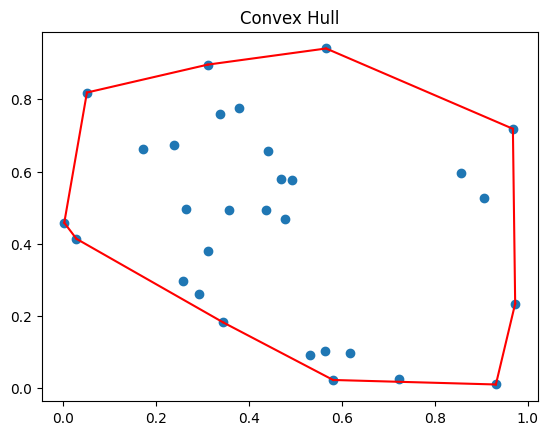

In [5]:
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

# 数据点
points = np.random.rand(30, 2)

# 计算凸包
hull = ConvexHull(points)

# 可视化凸包
plt.plot(points[:, 0], points[:, 1], 'o')
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'r-')
plt.title("Convex Hull")
plt.show()

#### **3.2 Delaunay 三角剖分 (`Delaunay`)**

Delaunay 三角剖分将点集分割为一组非重叠的三角形。

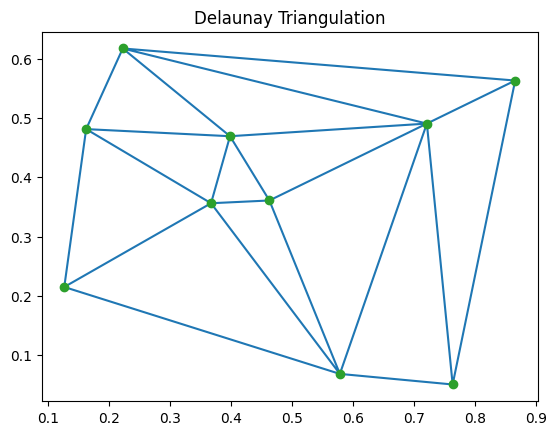

In [6]:
from scipy.spatial import Delaunay

# 数据点
points = np.random.rand(10, 2)

# Delaunay 三角剖分
tri = Delaunay(points)

# 可视化三角剖分
plt.triplot(points[:, 0], points[:, 1], tri.simplices)
plt.plot(points[:, 0], points[:, 1], 'o')
plt.title("Delaunay Triangulation")
plt.show()

### **总结**

| 功能                     | 方法                      | 作用                                                   |
|--------------------------|---------------------------|-------------------------------------------------------|
| **距离计算**             | `distance_matrix`, `pdist`, `cdist` | 计算点之间的距离矩阵或样本点对距离。                   |
| **最近邻搜索**           | `KDTree`, `BallTree`      | 搜索最邻近的点，高效处理大规模点集。                   |
| **凸包**                | `ConvexHull`              | 计算点集的最小凸多边形。                               |
| **Delaunay 三角剖分**   | `Delaunay`                | 将点集划分为非重叠的三角形。                          |
